# Week 04 Exercises 

## 4.1

Let's start with some basic practice using the **shapely** package. Do the following steps:


<ol type="a">
  <li>Creat a polygon from the following points: (-118.4152,33.9699), (-118.4152,33.9689),(-118.4144,33.9689),(-118.4143, 33.96890,(-118.4142,33.96990,9-118.4152,33.9699)</li>
  <li>Create a new variable that stores both x and y coordinates</li>
  <li>What is the centroid of this polygon?</li>
  <li>What is the bounding box? Write an explanation of what the bounding box actual means relative to the polygon.</li>
</ol>


In [7]:
#import
import numpy as np
from shapely.geometry import Polygon

#make le polygon
poly = Polygon([(-118.4152,33.9699), (-118.4152,33.9689),(-118.4144,33.9689),(-118.4143, 33.96890),(-118.4142,33.96990,-118.4152,33.9699)])

#make new variable
newvariable = [(-118.4152,33.9699), (-118.4152,33.9689),(-118.4144,33.9689),(-118.4143, 33.96890),(-118.4142,33.96990,-118.4152,33.9699)]

#get centroid
polycentroid = poly.centroid
print("The centroid of the polygon is", polycentroid)

#bounding box
polyboundingbox = poly.bounds
print("The bounding box of the polygon is", polyboundingbox)

The centroid of the polygon is POINT (-118.4147245614035 33.96940877192983)
The bounding box of the polygon is (-118.4152, 33.9689, -118.4142, 33.9699)


The bounding box is the smallest possible box that could encapsulate the polygon.

## 4.2

Now let's move on with practicing using **geopandas** and working with various CRS. We will use the County of Los Angeles Justice Equity Need Index (by zip code). Some information on the dataset:
The Justice Equity Need Index (JENI) identifies ZIP Codes in greatest need of public investments in community healing, health, and prevention to help reverse historical injustices. Updated 2022.

The Justice Equity Need Index (JENI), by Advancement Project California, offers a means to map out the disparate burden that criminalization and a detention-first justice model place on specific communities. The index includes the following indicators:

<ol type="1">

<li>System Involvement: The system-involved population by ZIP Code results in direct needs for justice equity, as measured by adult and youth probation.

- Indicators: Adult Probation (per 1,000 people); Youth Probation (per 1,000 people) </li>

<li>Inequity Drivers: Root inequities across communities that contribute to racial and economic disparities as seen in incarceration and policing.

- Indicators: Black, Latinx, AIAN, and NHPI Percentages of Population (average percentile); Unemployment Rate (%); Population aged 25+ without a High School Diploma (%); Population below 200% of the Federal Poverty Level (%); Violent Crime Rate (per 1,000 people)</li>

<li>Criminalization Risk: Conditions where the criminal justice system has historically taken a detention-first, prevention-last approach.

- Indicators: Mental Health Hospitalizations (per 1,000 people); Substance Use-Related Hospitalizations (per 1,000 people); Homelessness Rate (per 1,000 people)</li>
</ol>

Learn more at https://www.advancementprojectca.org/tools-we-use/maps-and-data/justice-equity-need-index.

Supervisorial Districts, SPAs, and CSAs determined by ZIP Code centroid.


Complete the following tasks:

<ol type="a">
  <li>Load the dataset as a geopandas dataframe. The data is located under 'data/Justice_Equity_Need_Index.geojson' </li>
  <li>What is the default CRS? Write a sentence about what type of CRS it is.</li>
  <li>Remember, geopandas is just the spatial version of pandas with lots of the same functionality. Knowing some commands from pandas from previous exercises, answer the following:

  - What is the size of the dataframe?
  - List the column names.
  - Show the first 10 rows of the dataframe. </li>
  <li>Make a copy of the dataframe. 

  - Reproject the CRS is epsg:3857
  - Use matplotlib to graph BOTH versions of the dataframe, in the original CRS and in the new reprojected CRS. Make sure to use clear titles
  - Write a few sentences of differences you see in the visualizations between the two.  </li>
</ol>


In [2]:
#import and read file
import geopandas as gpd
data = gpd.read_file('data/Justice_Equity_Need_Index.geojson')

data.crs

ERROR 1: PROJ: proj_create_from_database: Open of /opt/tljh/user/share/proj failed


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**It is using the WGS84 Coordinate Systems which uses Greenwich as the starting point for the longtiude and uses degrees as units. The refrence code for this coordinate system is 4326.**

In [8]:
#size of data
data.shape

#list column names
data.columns

#Show the first 10 rows of the dataframe
data.head(10)

#make copy of data
datacopy = data.copy()

#Reproject the CRS is epsg:3857
datacopy = data.to_crs(epsg=3857)

datacopy.crs


<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

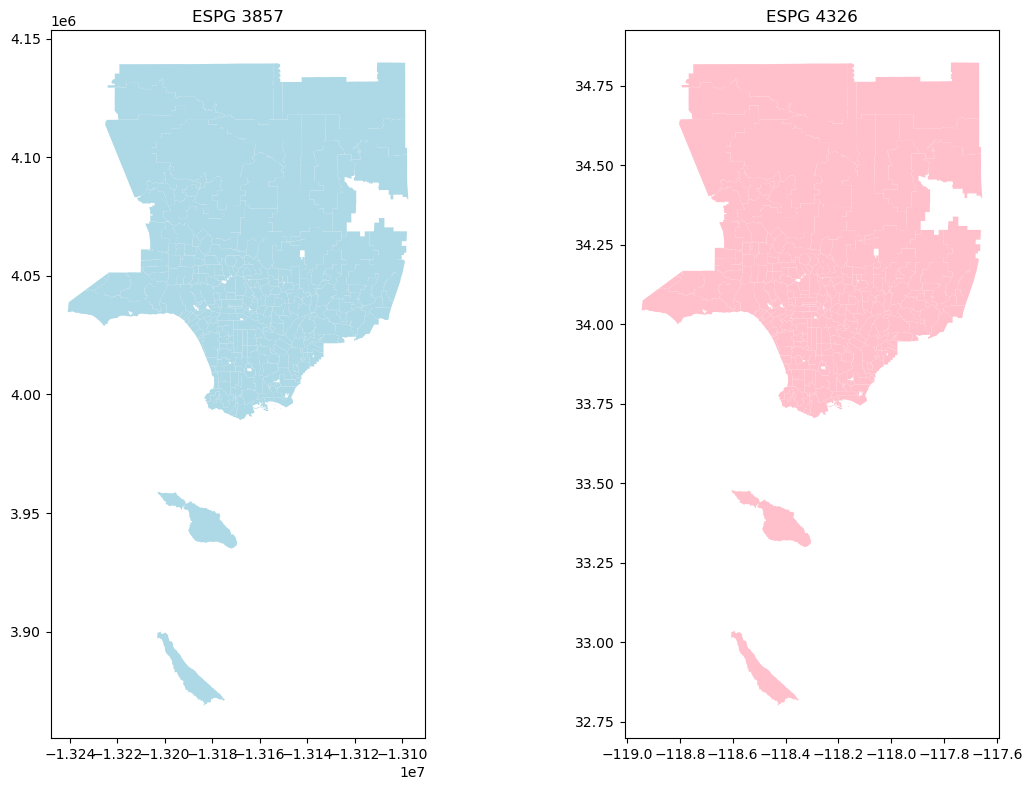

In [15]:
# Use matplotlib to graph BOTH versions of the dataframe, 
# in the original CRS and in the new reprojected CRS. Make sure to use clear titles

%matplotlib inline
import matplotlib.pyplot as plt

# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot the data in WGS84 CRS
datacopy.plot(ax=ax1, facecolor='lightblue');

# Add title
ax1.set_title("ESPG 3857");

# Plot the one with ETRS-LAEA projection
data.plot(ax=ax2, facecolor='pink');

# Add title
ax2.set_title("ESPG 4326");

# Remove empty white space around the plot
plt.tight_layout()

**The axis are much different because they use different datums as starting points. The ESPG 4326 uses a more standard latitude and longitude coordinate range.**